# Machine Learning Project

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

#Unique to this f
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Parse data file for model
df = pd.read_csv('variants_with_obj_function.csv')
print("Original Shape", df.shape)
# Add 16 new columns to the front of the DataFrame
for i in range(16):
    col_name = 'Variant{}'.format(i+1)
    df.insert(i, col_name, df['Variant Combination'])
    df[col_name] = df[col_name].str.slice(i, i+1) # IF need to change A to 1 and B to 0 make it here
#     df[col_name] = df[col_name].replace({'A': -1, 'B': 1})
    
df = df.drop(columns=['Unnamed: 0', 'replicate', 'Variant Combination'])

df = df.loc[df['Objective Function Value'] <= 10]

df_encoded = pd.get_dummies(df, columns=['Variant1', 'Variant2', 'Variant3', 'Variant4', 'Variant5', 'Variant6', 'Variant7', 'Variant8', 'Variant9', 'Variant10', 'Variant11', 'Variant12', 'Variant13', 'Variant14', 'Variant15', 'Variant16'])

print("Original Shape", df_encoded.shape)
print(df_encoded)

Original Shape (65536, 4)
Original Shape (39894, 33)
       Objective Function Value  Variant1_A  Variant1_B  Variant2_A  \
18                     5.414224           1           0           1   
22                     5.414222           1           0           1   
26                     5.414243           1           0           1   
30                     5.414230           1           0           1   
48                     8.702512           1           0           1   
...                         ...         ...         ...         ...   
65531                  2.970487           0           1           0   
65532                  2.975706           0           1           0   
65533                  2.985979           0           1           0   
65534                  2.919980           0           1           0   
65535                  2.970328           0           1           0   

       Variant2_B  Variant3_A  Variant3_B  Variant4_A  Variant4_B  Variant5_A  \
18           

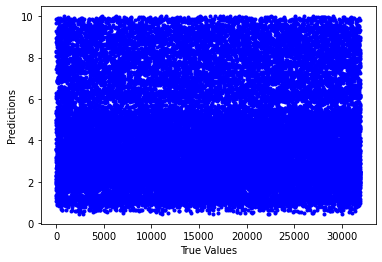

In [3]:
# Split data into training and testing sets
# X = df.iloc[:, :-1] # select all columns except the last one (Objective Function Value)
# y = df.iloc[:, -1] # select only the last column (Objective Function Value)

X = df_encoded.drop(['Objective Function Value'], axis=1)
y = df_encoded['Objective Function Value']
y_sqrt = np.sqrt(y)
y_log = np.log(y + 1)


# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape

# Plot MSE
plt.plot(range(len(y_train)), y_train, '.', color='blue')
# plt.plot(range(20), y_pred[:20], '.', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


In [4]:
# Define the MLP model
def create_mlp(input_dim, structure, output_dim):
    model = Sequential()
    
    for i in range(len(structure)):
        if (i == 0):
            model.add(Dense(structure[0], input_dim=input_dim, activation='relu'))
        else:
            model.add(Dense(structure[i], input_dim=structure[i-1], activation='relu'))
    
    
    model.add(Dense(output_dim, activation='linear'))
    return model

def create_structure(input_dim, output_dim, depth):
    structure_dec = []
    structure_round = []
    
    for i in range(depth):
        new_layer_hidden = 0
        if (len(structure_dec) > 0):
            new_layer_hidden = (structure_dec[-1] * (2/3)) + output_dim
        else:
            new_layer_hidden = (input_dim * (2/3)) + output_dim
        structure_dec.append(new_layer_hidden)
        
    for val in structure_dec:
        structure_round.append(round(val))
    return structure_round

[22, 16, 12, 9, 7]
Epoch 1/100
639/639 [==============================] - 1s 1ms/step - loss: 9.7188 - mse: 9.7188 - val_loss: 4.2496 - val_mse: 4.2496
Epoch 2/100
639/639 [==============================] - 0s 776us/step - loss: 4.1304 - mse: 4.1304 - val_loss: 3.4545 - val_mse: 3.4545
Epoch 3/100
639/639 [==============================] - 1s 902us/step - loss: 3.3748 - mse: 3.3748 - val_loss: 2.9697 - val_mse: 2.9697
Epoch 4/100
639/639 [==============================] - 0s 775us/step - loss: 2.8479 - mse: 2.8479 - val_loss: 2.6033 - val_mse: 2.6033
Epoch 5/100
639/639 [==============================] - 0s 781us/step - loss: 2.5872 - mse: 2.5872 - val_loss: 2.3554 - val_mse: 2.3554
Epoch 6/100
639/639 [==============================] - 0s 782us/step - loss: 2.3063 - mse: 2.3063 - val_loss: 2.0990 - val_mse: 2.0990
Epoch 7/100
639/639 [==============================] - 0s 778us/step - loss: 1.9590 - mse: 1.9590 - val_loss: 1.7202 - val_mse: 1.7202
Epoch 8/100
639/639 [=================

639/639 [==============================] - 0s 781us/step - loss: 0.1646 - mse: 0.1646 - val_loss: 0.1787 - val_mse: 0.1787
Epoch 62/100
639/639 [==============================] - 0s 782us/step - loss: 0.1689 - mse: 0.1689 - val_loss: 0.1673 - val_mse: 0.1673
Epoch 63/100
639/639 [==============================] - 1s 783us/step - loss: 0.1589 - mse: 0.1589 - val_loss: 0.1530 - val_mse: 0.1530
Epoch 64/100
639/639 [==============================] - 1s 783us/step - loss: 0.1618 - mse: 0.1618 - val_loss: 0.1590 - val_mse: 0.1590
Epoch 65/100
639/639 [==============================] - 1s 785us/step - loss: 0.1544 - mse: 0.1544 - val_loss: 0.1589 - val_mse: 0.1589
Epoch 66/100
639/639 [==============================] - 0s 780us/step - loss: 0.1612 - mse: 0.1612 - val_loss: 0.1677 - val_mse: 0.1677
Epoch 67/100
639/639 [==============================] - 1s 783us/step - loss: 0.1584 - mse: 0.1584 - val_loss: 0.1678 - val_mse: 0.1678
Epoch 68/100
639/639 [==============================] - 1s 78

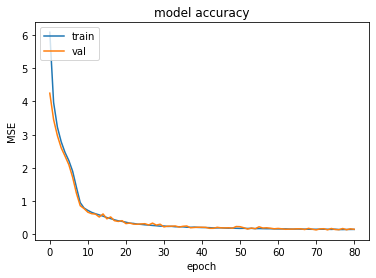

,Structure,Val MSE,Epochs
0,"[22, 16, 12, 9, 7]",0.152954,81


In [5]:
data = []
# X_train = X
# y_train = y_log
input_dim = X_train.shape[1]
output_dim = 1
depth = 5

structure = create_structure(input_dim, output_dim, depth)
print(structure)

# Set up the session config to limit GPU memory usage
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)
model = 0

# Create the model
with tf.device('/GPU:0'): # specify the GPU to use
    model = create_mlp(input_dim, structure, output_dim)

    # Compile the model with an optimizer and loss function
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

    # Train the model with early stopping
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    history = model.fit(X_train, y_train, epochs=100, batch_size=40, validation_split=0.2, callbacks=[early_stop])

    plt.plot(history.history['mse'])
    plt.plot(history.history['val_mse'])
    plt.title('model accuracy')
    plt.ylabel('MSE')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    data.append([structure, history.history['val_mse'][-1], len(history.history['val_mse'])])

df = pd.DataFrame(data, columns=('Structure', 'Val MSE', 'Epochs'))
df_sorted = df.sort_values(by='Val MSE')
df_sorted

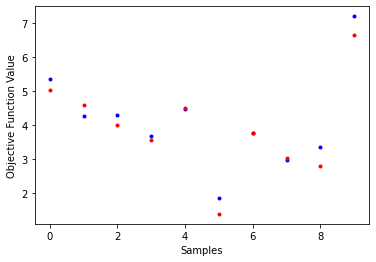

In [6]:
y_pred = model.predict(X_test)

# Plot Guesses
num = 10
plt.plot(range(num), y_test[:num], '.', color='blue')
plt.plot(range(num), y_pred[:num], '.', color='red')
plt.xlabel('Samples')
plt.ylabel('Objective Function Value')
plt.show()

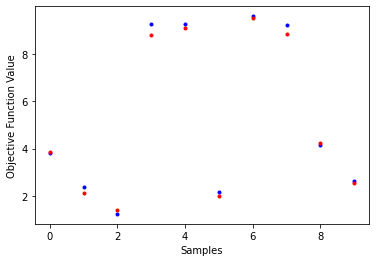

In [94]:
# Plot Guesses
num = 20
plt.plot(range(10), y_test[10:num], '.', color='blue')
plt.plot(range(10), y_pred[10:num], '.', color='red')
plt.xlabel('Samples')
plt.ylabel('Objective Function Value')
plt.show()

In [127]:
X = df_encoded.drop(['Objective Function Value'], axis=1)
X.loc[len(X)] = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
print(X.loc[len(X)])
y_pred = model.predict(X.loc[len(X)].values.reshape(1, -1))

Variant1_A     1
Variant1_B     0
Variant2_A     1
Variant2_B     0
Variant3_A     1
Variant3_B     0
Variant4_A     1
Variant4_B     0
Variant5_A     1
Variant5_B     0
Variant6_A     1
Variant6_B     0
Variant7_A     1
Variant7_B     0
Variant8_A     1
Variant8_B     0
Variant9_A     1
Variant9_B     0
Variant10_A    1
Variant10_B    0
Variant11_A    1
Variant11_B    0
Variant12_A    1
Variant12_B    0
Variant13_A    1
Variant13_B    0
Variant14_A    1
Variant14_B    0
Variant15_A    1
Variant15_B    0
Variant16_A    1
Variant16_B    0
Name: 39894, dtype: uint8


In [128]:
y_pred

array([[12.348241]], dtype=float32)